In [80]:
import geopandas as gpd
import folium
from pathlib import Path
import rasterio
import leafmap.leafmap as leafmap
import os
from pyproj import Transformer
import matplotlib.pyplot as plt
from rasterio.plot import show
import geojson
import shapely.wkt
os.environ['LOCALTILESERVER_CLIENT_PREFIX'] = 'proxy/{port}'

# Read parcels data

In [2]:
raw_data = Path("../data/raw_data/")

'CRS:'

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

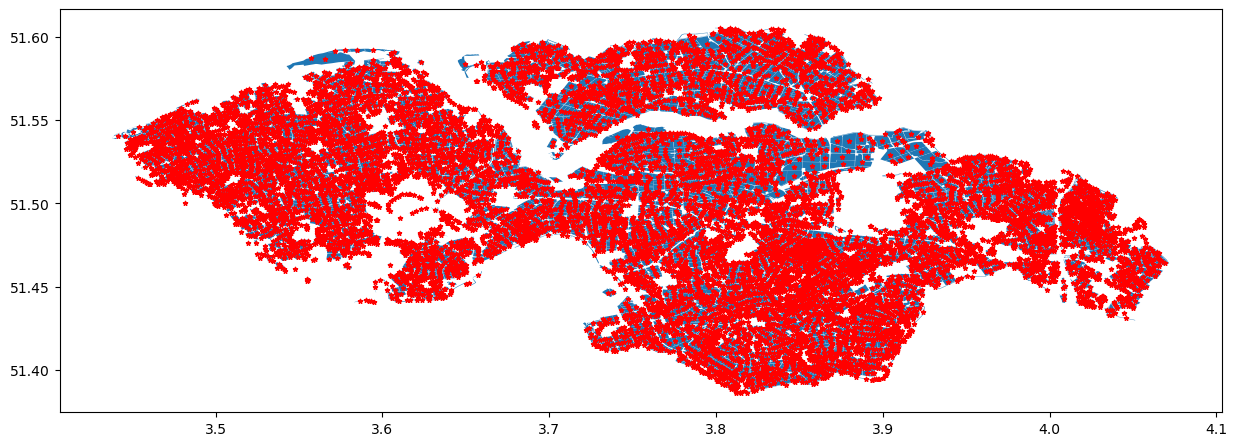

,objectid,area,crop_type,geometry
0,1526170,51374.322841,winter_common_soft_wheat,"MULTIPOLYGON (((3.79995 51.47216, 3.80034 51.4..."
1,1526353,96633.566485,chicory_chicories,"MULTIPOLYGON (((3.76622 51.49420, 3.76622 51.4..."
2,1526354,3829.956679,sugar_beet,"MULTIPOLYGON (((3.78401 51.49023, 3.78425 51.4..."


In [75]:
parcels_df = gpd.read_file(raw_data / "nl_parcels_subset_small.gpkg")
display("CRS:", parcels_df.crs)
#parcels_df.iloc[0]['geometry'].centroid
centroid_list = parcels_df.apply(lambda row : row['geometry'].centroid , axis=1)
#print(centroid_list[0])
#parcels_df.head(3)
coord_list = [(x, y) for x, y in zip(centroid_list.x, centroid_list.y)]
new_df = gpd.GeoDataFrame(geometry = centroid_list)
'''trans = Transformer.from_crs(
    "EPSG:3035",
    "EPSG:4326",
    always_xy=True,
)
xx, yy = trans.transform(centroid_list.x, centroid_list.y)
coord_list = [(x, y) for x, y in zip(xx, yy)]
print(coord_list[:3])'''
fig,ax = plt.subplots(figsize = (15,15))
parcels_df.plot(ax = ax)
g = new_df.plot(ax = ax, markersize = 10, color = 'red',marker = '*',label = 'NL')
plt.show()
parcels_df.head(3)

# Read Soil Organic Carbon Map

In [4]:
print("""Overview: Soil log organic carbon content in weight fraction [g/kg]

Traceability (lineage): Predictions of soil properties were generated by using legacy soil samples and profiles for Europe, primarily from LUCAS soil, GEMAS and national soil profile databases, most importantly BZE LW German national soil profile DB. Points were overlay using spacetime reference (latitutude, longitude, year of sampling) versus some 220 time-series and static layers representing soil forming factors: climate, relief, surface reflectance, vegetation indices, hydrological indices. Ensemble Machine Learning models were fitted per soil property for the whole spacetime cube (2000-2020) and then used to predict values at 4 standard depths. For each pixel we also provide prediction error.

Scientific methodology: Predictions are based on Ensemble Machine Learning using 3D predictive soil mapping framework explained in detail in: https://opengeohub.github.io/spatial-prediction-eml/spatial-interpolation-in-3d-using-ensemble-ml.html. 3D predictive soil mapping is also explained in detail in https://soilmapper.org.

Usability: The dataset is suited for farm-scale and regional applications for monitoring soil dynamics for Europe for 2000-2020. Targeted intended uses of the data include: Land restoration and regenerative agriculture projects; An open platform for soil organic carbon monitoring; Time-series analysis of trends in soil properties and detection of positive and negative drivers of change; Uncertainty guided sampling to help improve predictions at local / regional levels;

Uncertainty quantification: Predictions errors are provided per pixel and can be used to estimate prediction intervals and mitigate dicision risks.

Data validation approaches: Prediction accuracy has been validated using 5-fold cross validation and is provided per soil property.

Completeness: The dataset covers the entire Geo-harmonizer region as defined by the landmask raster dataset. However, some small islands might be missing if there are no data in the original ERA5 Land dataset.

Consistency: Predictions are based on single pan-European models, hence it is assumed that all predictions are consistent / unbiased and no additional corrections are needed.

Positional accuracy: 30 m spatial resolution

Temporal accuracy: The maps cover the period 2000 - 2020, each map covers a certain number of years according to the following scheme: (1) 2000--2002, (2) 2002--2006, (3) 2006--2010, (4) 2010--2014, (5) 2014--2018 and (6) 2018--2020

Thematic accuracy: Raster values represent various soil properties soil carbon (g/kg), soil pH, bulk density, sand content and clay content."""
       )

Overview: Soil log organic carbon content in weight fraction [g/kg]

Traceability (lineage): Predictions of soil properties were generated by using legacy soil samples and profiles for Europe, primarily from LUCAS soil, GEMAS and national soil profile databases, most importantly BZE LW German national soil profile DB. Points were overlay using spacetime reference (latitutude, longitude, year of sampling) versus some 220 time-series and static layers representing soil forming factors: climate, relief, surface reflectance, vegetation indices, hydrological indices. Ensemble Machine Learning models were fitted per soil property for the whole spacetime cube (2000-2020) and then used to predict values at 4 standard depths. For each pixel we also provide prediction error.

Scientific methodology: Predictions are based on Ensemble Machine Learning using 3D predictive soil mapping framework explained in detail in: https://opengeohub.github.io/spatial-prediction-eml/spatial-interpolation-in-3d-u

'Meta:'

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 255.0,
 'width': 1759,
 'height': 1194,
 'count': 1,
 'crs': CRS.from_epsg(3035),
 'transform': Affine(30.0, 0.0, 3864390.0,
        0.0, -30.0, 3193210.0)}

'Stats:'

Statistics(min=22.0, max=41.0, mean=30.491724791215, std=2.5945111261936)

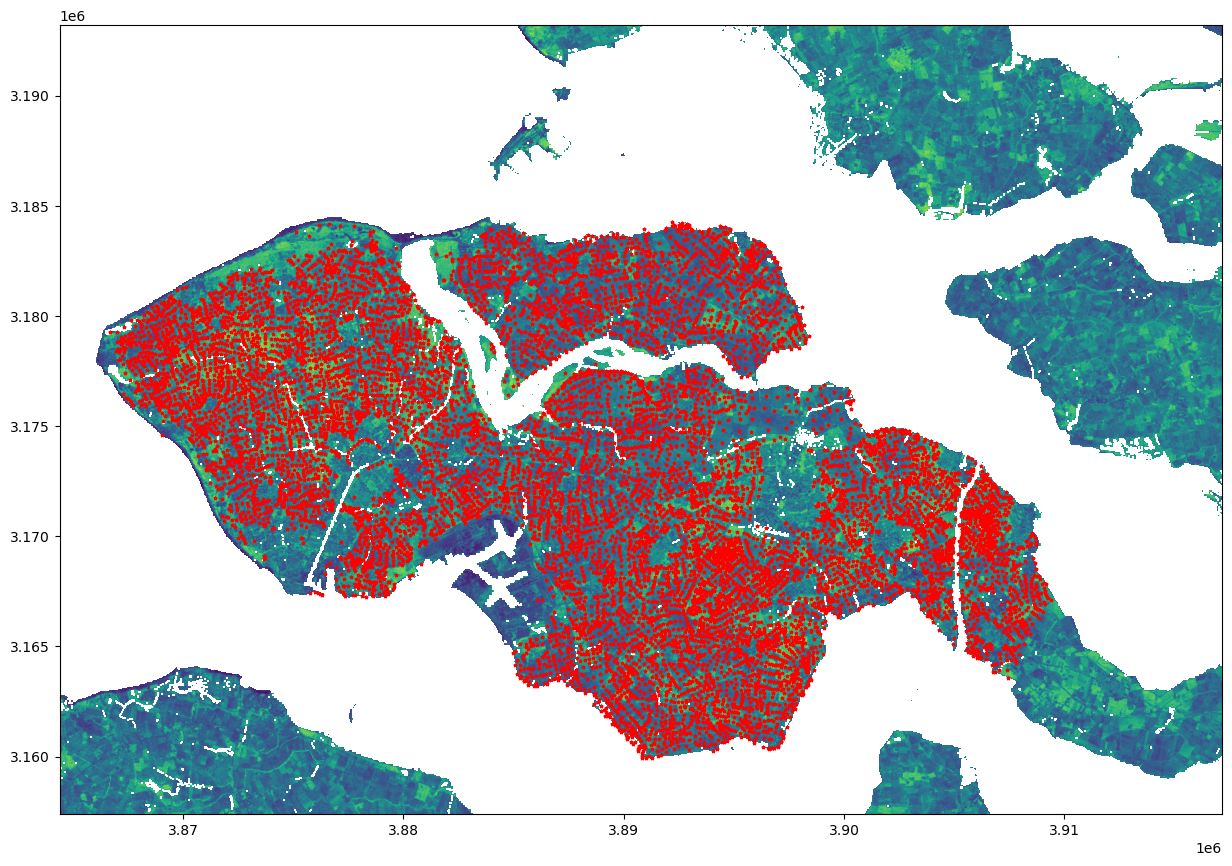

                          geometry soc_potential  objectid
0  POINT (3890693.885 3169515.147)        [11.0]   1526170
1  POINT (3888424.539 3172238.743)        [13.0]   1526353
2  POINT (3889927.516 3171644.252)        [13.0]   1526354
3  POINT (3903917.688 3168025.154)        [14.0]   1526436
4  POINT (3903912.090 3168957.204)        [10.0]   1526437
5  POINT (3887353.424 3180923.166)        [13.0]   1526509
6  POINT (3903609.964 3168440.671)        [10.0]   1526528
7  POINT (3904252.203 3168728.320)        [13.0]   1526529
8  POINT (3891188.949 3169541.617)         [8.0]   1526632
9  POINT (3904640.622 3169037.178)         [8.0]   1526709


In [78]:
carbon_tif_path = raw_data / "soil_log_organic_carbon_content_2020.tif"
with rasterio.open(carbon_tif_path) as f:
    display("Meta:", f.meta)
    raster_stats = f.statistics(bidx=1)
    display("Stats:", raster_stats)
    fig,ax = plt.subplots(figsize = (15,15))
    #parcels_df.plot(ax = ax)
    show(f, ax=ax)
    new_df = gpd.GeoDataFrame(geometry = centroid_list,crs=parcels_df.crs)
    new_df = new_df.to_crs(f.crs)
    g = new_df.plot(ax = ax, markersize = 5, color = 'red',marker = '*',label = 'NL')
    #plt.show()
    
    plt.show()
    coord_list = [(x, y) for x, y in zip(new_df["geometry"].x, new_df["geometry"].y)]
    new_df["soc_potential"] = [raster_stats.max - x for x in f.sample(coord_list)]
    new_df["objectid"] = parcels_df["objectid"]
    g1 = shapely.wkt.loads(s)
    g2 = geojson.Feature(geometry=g1, properties={})
    g2.geometry
    print(new_df.head(10))

## Visualize the data

In [31]:
m = leafmap.Map(
    basemap="CartoDB.DarkMatter",
    zoom=2,
    draw_control=False,
    measure_control=False,
    fullscreen_control=False,
    attribution_control=True,
)

#m.add_gdf(new_df)
m.add_raster(
    str(carbon_tif_path), layer_name='Soil Organic Carbon', vmin=raster_stats.min, vmax=raster_stats.max, palette="viridis")
m

Map(center=[20, 0], controls=(AttributionControl(options=['position', 'prefix'], position='bottomright'), Zoom…

In [83]:
parcels_df = None
raw_data = None
def load_parcels_data():
    global parcels_df, raw_data
    raw_data = Path("../data/raw_data/")
    parcels_df = gpd.read_file(raw_data / "nl_parcels_subset_small.gpkg")

def add_centroid():
    parcels_df["Centroid"] = parcels_df.apply(lambda row : row['geometry'].centroid , axis=1)

def add_soc():
    carbon_tif_path = raw_data / "soil_log_organic_carbon_content_2020.tif"
    with rasterio.open(carbon_tif_path) as f:
        raster_stats = f.statistics(bidx=1)

        add_centroid()
        centroid_list = parcels_df["Centroid"]

        new_df = gpd.GeoDataFrame(geometry = centroid_list,crs=parcels_df.crs)
        new_df = new_df.to_crs(f.crs)

        coord_list = [(x, y) for x, y in zip(new_df["geometry"].x, new_df["geometry"].y)]
        parcels_df["SOC"] = [raster_stats.max - x for x in f.sample(coord_list)]

load_parcels_data()
add_centroid()
add_soc()
parcels_df.head()

,objectid,area,crop_type,geometry,Centroid,SOC
0,1526170,51374.322841,winter_common_soft_wheat,"MULTIPOLYGON (((3.79995 51.47216, 3.80034 51.4...",POINT (3.79847 51.47176),[11.0]
1,1526353,96633.566485,chicory_chicories,"MULTIPOLYGON (((3.76622 51.49420, 3.76622 51.4...",POINT (3.76257 51.49440),[13.0]
2,1526354,3829.956679,sugar_beet,"MULTIPOLYGON (((3.78401 51.49023, 3.78425 51.4...",POINT (3.78487 51.49023),[13.0]
3,1526436,8116.934914,nurseries_nursery,"MULTIPOLYGON (((3.98940 51.46791, 3.98940 51.4...",POINT (3.99000 51.46835),[14.0]
4,1526437,94258.776946,grain_maize_corn_popcorn,"MULTIPOLYGON (((3.98666 51.47670, 3.98666 51.4...",POINT (3.98882 51.47669),[10.0]


In [84]:
parcels_df[0:5]

,objectid,area,crop_type,geometry,Centroid,SOC
0,1526170,51374.322841,winter_common_soft_wheat,"MULTIPOLYGON (((3.79995 51.47216, 3.80034 51.4...",POINT (3.79847 51.47176),[11.0]
1,1526353,96633.566485,chicory_chicories,"MULTIPOLYGON (((3.76622 51.49420, 3.76622 51.4...",POINT (3.76257 51.49440),[13.0]
2,1526354,3829.956679,sugar_beet,"MULTIPOLYGON (((3.78401 51.49023, 3.78425 51.4...",POINT (3.78487 51.49023),[13.0]
3,1526436,8116.934914,nurseries_nursery,"MULTIPOLYGON (((3.98940 51.46791, 3.98940 51.4...",POINT (3.99000 51.46835),[14.0]
4,1526437,94258.776946,grain_maize_corn_popcorn,"MULTIPOLYGON (((3.98666 51.47670, 3.98666 51.4...",POINT (3.98882 51.47669),[10.0]
